# Exploratory Data Analysis for predicting the best quality white wine

In [2]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
white_wine_csv = './datasets/winequality-white.csv'
white_wine = pd.read_csv(white_wine_csv, sep=';')

In [4]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
#renamed column names 
white_wine.columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_diox', 'ttl_sulfur_diox', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [6]:
white_wine.shape

(4898, 12)

In [7]:
white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_diox,ttl_sulfur_diox,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
#double-check column names
white_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_diox', 'ttl_sulfur_diox', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
#find number of unique values for each variable
white_wine.nunique(axis=0)

fixed_acidity        68
volatile_acidity    125
citric_acid          87
residual_sugar      310
chlorides           160
free_sulfur_diox    132
ttl_sulfur_diox     251
density             890
pH                  103
sulphates            79
alcohol             103
quality               7
dtype: int64

In [10]:
#get quick summ stats for dataset
white_wine.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_diox,ttl_sulfur_diox,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
#check for NaN values
white_wine.isnull().values.any()

False

In [12]:
#another check for NaN values by column
white_wine.isnull().sum()

fixed_acidity       0
volatile_acidity    0
citric_acid         0
residual_sugar      0
chlorides           0
free_sulfur_diox    0
ttl_sulfur_diox     0
density             0
pH                  0
sulphates           0
alcohol             0
quality             0
dtype: int64

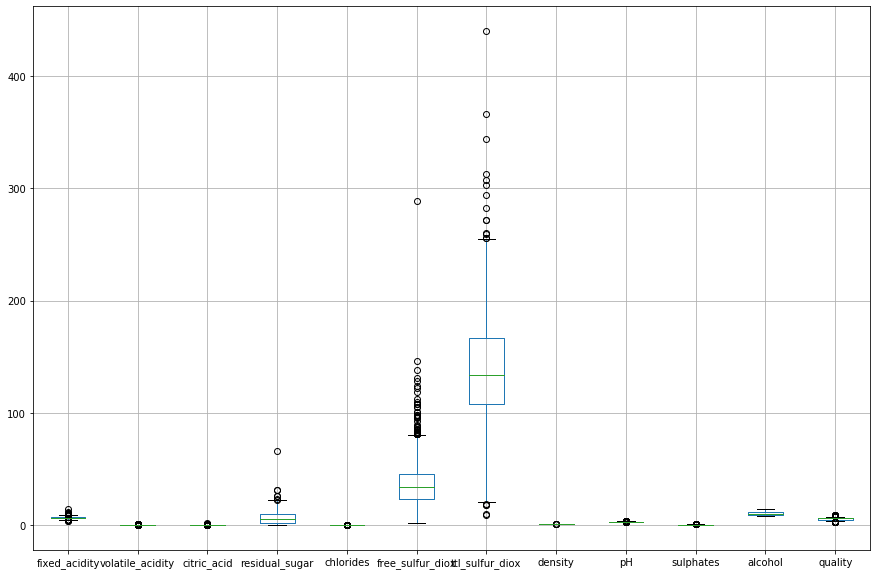

In [13]:
#boxplot to see outliers for each variable
white_wine.boxplot(figsize=(15,10));

In [14]:
white_wine.corr

<bound method DataFrame.corr of       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020

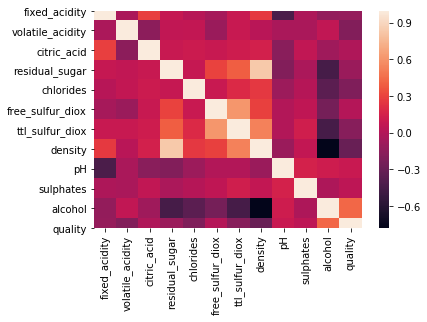

In [15]:
#heatmap to see which variable correlates to each other
sns.heatmap(white_wine.corr());

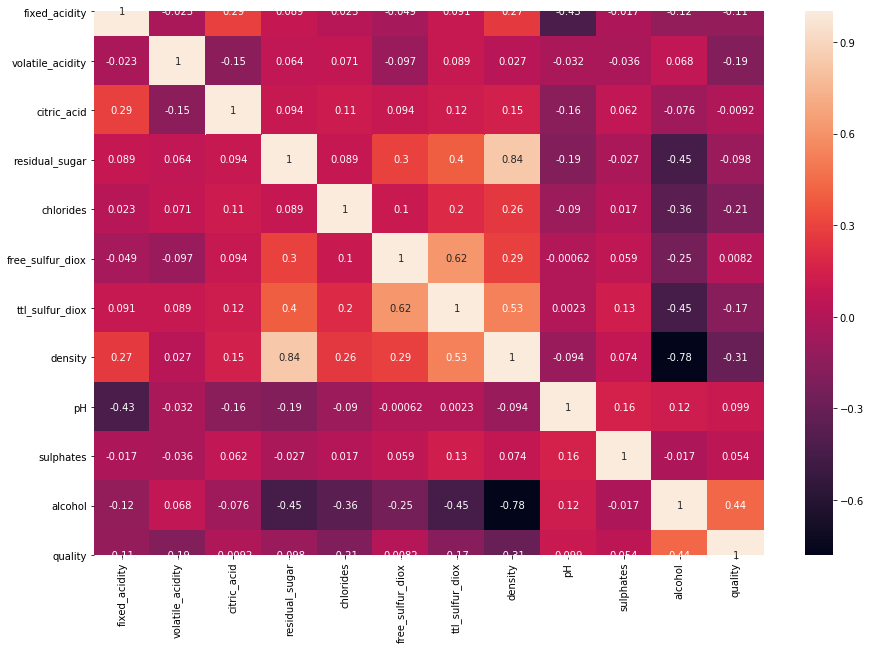

In [16]:
# calculate correlation matrix
f, ax = plt.subplots(figsize=(15, 10))
corr = white_wine.corr()
# plot the heatmap with specific values
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True);

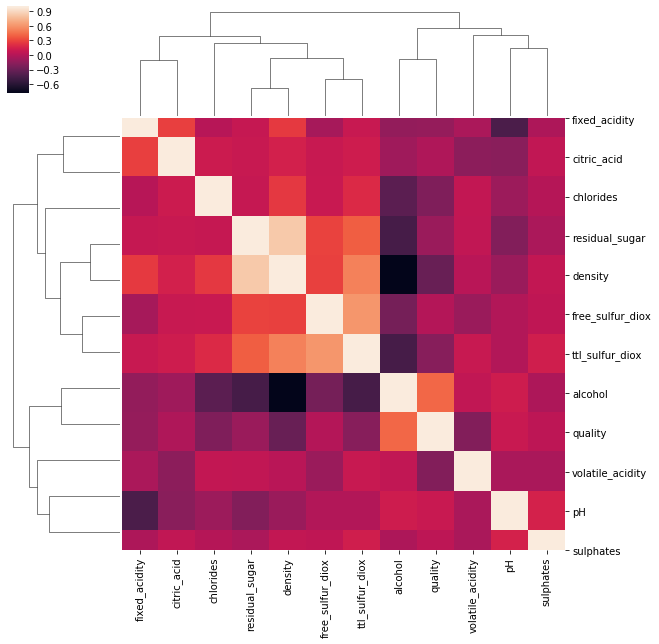

In [17]:
#another correlation clustermap
sns.clustermap(white_wine.corr());

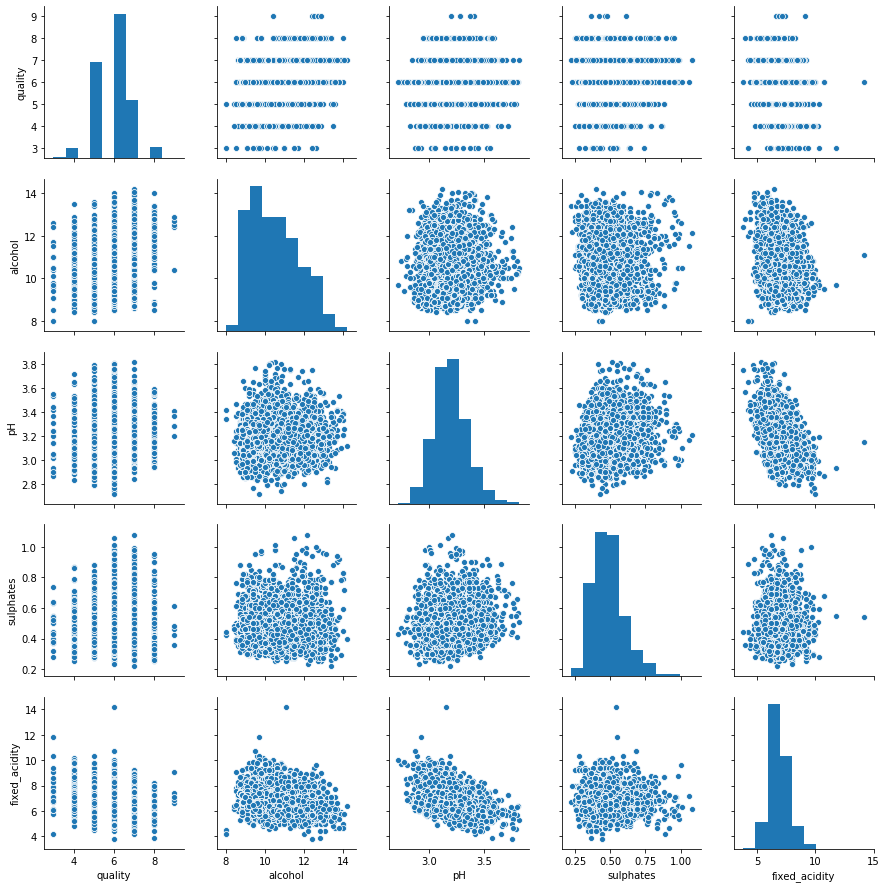

In [18]:
sns.pairplot(white_wine, vars=['quality', 'alcohol', 'pH', 'sulphates', 'fixed_acidity']);

/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


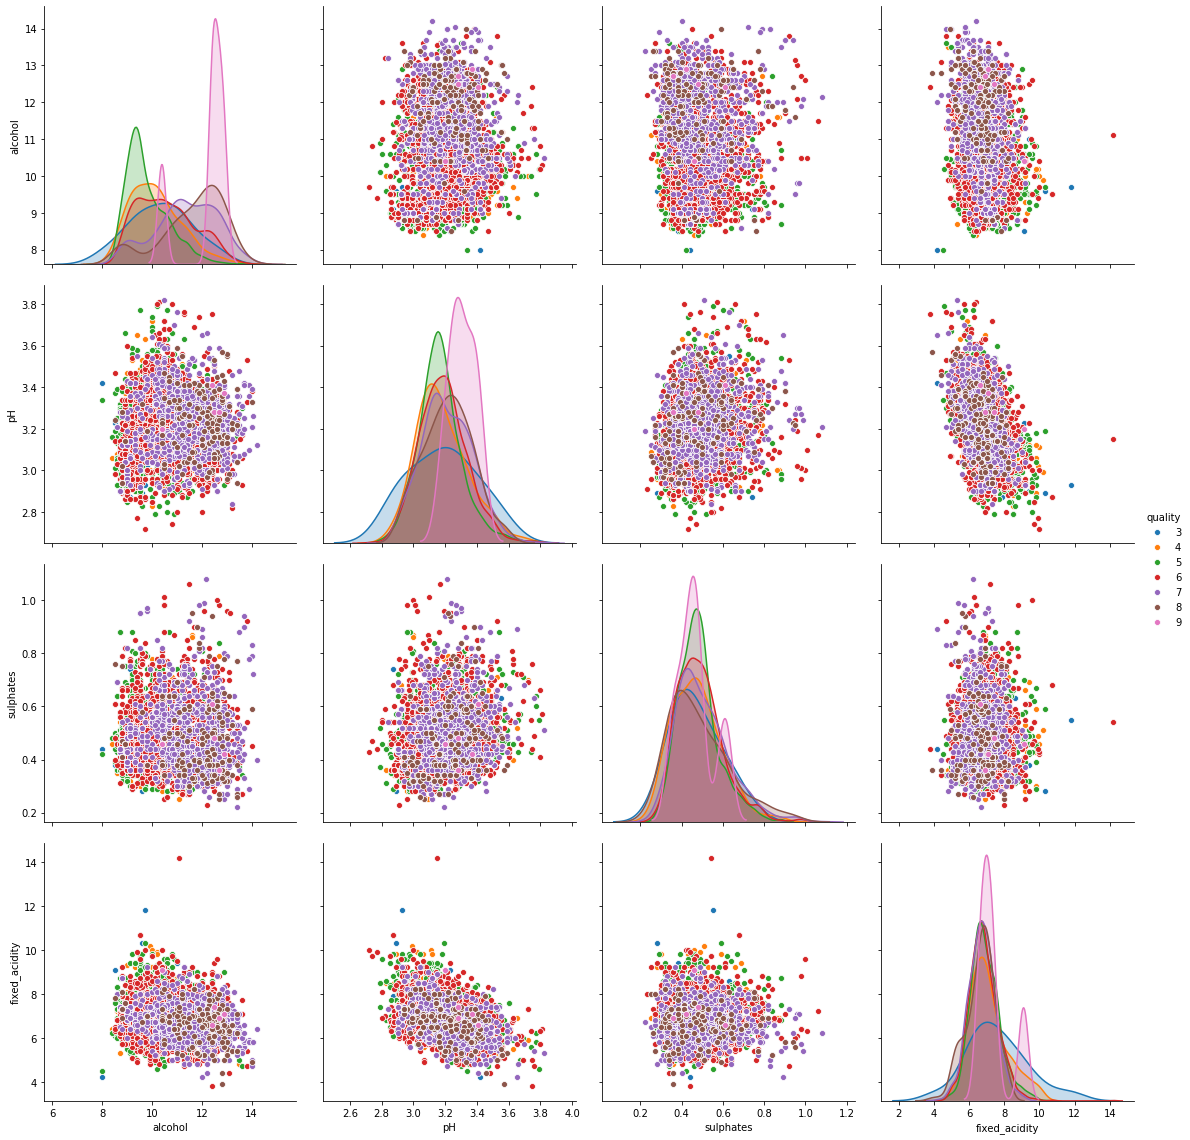

In [19]:
sns.pairplot(white_wine, vars=['alcohol', 'pH', 'sulphates', 'fixed_acidity'], hue = 'quality', diag_kind = 'kde',
             size = 4)

In [20]:
white_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [21]:
white_wine['quality'].value_counts(normalize=True)

6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: quality, dtype: float64

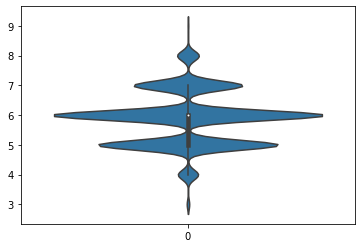

In [22]:
sns.violinplot(data=white_wine['quality']);

In [23]:
white_wine['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [24]:
white_wine.corr()[['quality']].sort_values(by='quality', ascending = False)

,quality
quality,1.000000
alcohol,0.435575
pH,0.099427
sulphates,0.053678
free_sulfur_diox,0.008158
citric_acid,-0.009209
residual_sugar,-0.097577
fixed_acidity,-0.113663
ttl_sulfur_diox,-0.174737
volatile_acidity,-0.194723


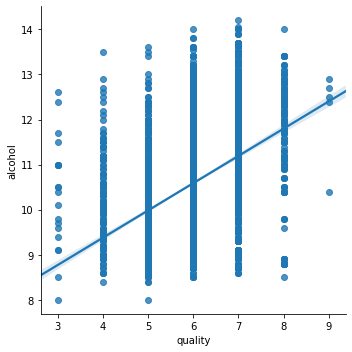

In [25]:
sns.lmplot(x='quality', y='alcohol', data=white_wine);

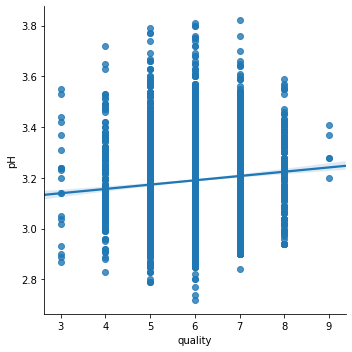

In [26]:
sns.lmplot(x='quality', y='pH', data=white_wine);

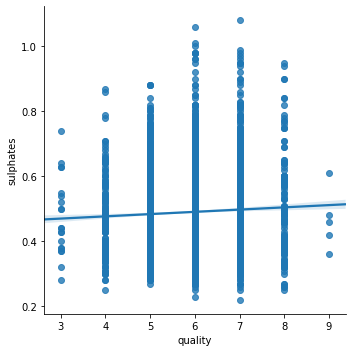

In [27]:
sns.lmplot(x='quality', y='sulphates', data=white_wine);

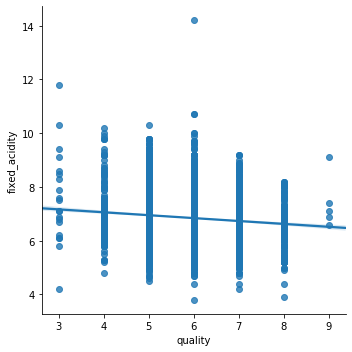

In [28]:
sns.lmplot(x='quality', y='fixed_acidity', data=white_wine);

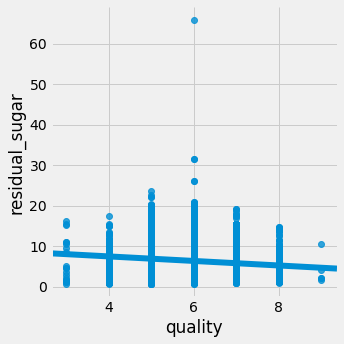

In [86]:
sns.lmplot(x='quality', y='residual_sugar', data=white_wine);

# X and y variables

Since quality is the response variable, I want to have a specific range that maps to a number that maps to a rating.  This new column will be named as Rating. 1 = Bad 2 = Average 3 = Good

In [29]:
rating = []
for i in white_wine['quality']:
    if i >= 1 and i <= 3:
        rating.append('1')
    elif i >= 4 and i <= 7:
        rating.append('2')
    elif i >= 8 and i <= 10:
        rating.append('3')
white_wine['rating'] = rating

In [30]:
white_wine.sort_values(by='quality', ascending=False)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_diox,ttl_sulfur_diox,density,pH,sulphates,alcohol,quality,rating
827,7.4,0.24,0.36,2.00,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,3
1605,7.1,0.26,0.49,2.20,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,3
876,6.9,0.36,0.34,4.20,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,3
774,9.1,0.27,0.45,10.60,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,3
820,6.6,0.36,0.29,1.60,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,7.5,0.32,0.24,4.60,0.053,8.0,134.0,0.99580,3.14,0.50,9.1,3,1
2373,7.6,0.48,0.37,1.20,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3,1
251,8.5,0.26,0.21,16.20,0.074,41.0,197.0,0.99800,3.02,0.50,9.8,3,1
1688,6.7,0.25,0.26,1.55,0.041,118.5,216.0,0.99490,3.55,0.63,9.4,3,1


In [31]:
white_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [32]:
white_wine['rating'].value_counts()

2    4698
3     180
1      20
Name: rating, dtype: int64

In [33]:
white_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_diox', 'ttl_sulfur_diox', 'density', 'pH',
       'sulphates', 'alcohol', 'quality', 'rating'],
      dtype='object')

In [34]:
cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_diox', 'ttl_sulfur_diox', 'density', 'pH',
       'sulphates', 'alcohol']
X = white_wine[cols]
y = white_wine['quality']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

features = ExtraTreesClassifier(random_state=1234)

features.fit(X_train, y_train)

print(features.feature_importances_) 

list(zip(list(X), features.feature_importances_))
#Higher scores are better. 

[0.07879309 0.10385184 0.08442539 0.08384393 0.08000169 0.09455369
 0.08701167 0.08928474 0.08427911 0.07993459 0.13402026]


/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[('fixed_acidity', 0.0787930859169409),
 ('volatile_acidity', 0.10385184173179784),
 ('citric_acid', 0.08442538964534609),
 ('residual_sugar', 0.08384392876912967),
 ('chlorides', 0.08000169001256899),
 ('free_sulfur_diox', 0.09455369467883118),
 ('ttl_sulfur_diox', 0.08701166589231221),
 ('density', 0.08928474152118357),
 ('pH', 0.08427911357115261),
 ('sulphates', 0.07993459121858357),
 ('alcohol', 0.1340202570421534)]

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [37]:
print(X_train.shape)
print(X_test.shape)

(3428, 11)
(1470, 11)


# Logistic Regression (Baseline)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# creating the model
logr = LogisticRegression()

# feeding the training and testing sets into the model
logr.fit(X_train, y_train)
logr.fit(X_test, y_test)

# predicting the results for the test and train set
y_test_pred = logr.predict(X_test)
y_train_pred = logr.predict(X_train)

#Measuring accuracy and RMSE

print("Training accuracy :", logr.score(X_train, y_train))
print("Testing accuracy :", logr.score(X_test, y_test))
train_rmse = mean_squared_error(y_train_pred, y_train)
print("Training RMSE: ", train_rmse)
test_rmse = mean_squared_error(y_test_pred, y_test)
print("Testing RMSE: ", test_rmse)

Training accuracy : 0.5253792298716453
Testing accuracy : 0.5387755102040817
Training RMSE:  0.6441073512252042
Testing RMSE:  0.6768707482993197


/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [39]:
#Measuring accuracy and RMSE

print("Training accuracy :", logr.score(X_train, y_train))
print("Testing accuracy :", logr.score(X_test, y_test))
train_rmse = mean_squared_error(y_train_pred, y_train)
print("Training RMSE: ", train_rmse)
test_rmse = mean_squared_error(y_test_pred, y_test)
print("Testing RMSE: ", test_rmse)

Training accuracy : 0.5253792298716453
Testing accuracy : 0.5387755102040817
Training RMSE:  0.6441073512252042
Testing RMSE:  0.6768707482993197


# Logistic Regression (4 Features + quality)

In [87]:
feature_cols = ['pH','sulphates', 'alcohol', 'volatile_acidity']
X = white_wine[feature_cols]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [58]:
# creating the model
logr = LogisticRegression()

# feeding the training and testing sets into the model
logr.fit(X_train, y_train)
logr.fit(X_test, y_test)

# predicting the results for the test and train set
y_test_pred = logr.predict(X_test)
y_train_pred = logr.predict(X_train)

#Measuring accuracy and RMSE

print("Training accuracy :", logr.score(X_train, y_train))
print("Testing accuracy :", logr.score(X_test, y_test))
train_rmse = mean_squared_error(y_train_pred, y_train)
print("Training RMSE: ", train_rmse)
test_rmse = mean_squared_error(y_test_pred, y_test)
print("Testing RMSE: ", test_rmse)

Training accuracy : 0.5247957992998833
Testing accuracy : 0.5346938775510204
Training RMSE:  0.6487747957992999
Testing RMSE:  0.6884353741496598


/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Logistic Regression (11 Features + rating)

In [63]:
feature_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_diox', 'ttl_sulfur_diox', 'density', 'pH',
       'sulphates', 'alcohol']
X = white_wine[feature_cols]
y = white_wine['rating']


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# creating the model
logr = LogisticRegression()

# feeding the training and testing sets into the model
logr.fit(X_train, y_train)
logr.fit(X_test, y_test)

# predicting the results for the test and train set
y_test_pred = logr.predict(X_test)
y_train_pred = logr.predict(X_train)

#Measuring accuracy and RMSE

print("Training accuracy :", logr.score(X_train, y_train))
print("Testing accuracy :", logr.score(X_test, y_test))
train_rmse = mean_squared_error(y_train_pred, y_train)
print("Training RMSE: ", train_rmse)
test_rmse = mean_squared_error(y_test_pred, y_test)
print("Testing RMSE: ", test_rmse)

Training accuracy : 0.9614935822637106
Testing accuracy : 0.9537414965986395
Training RMSE:  0.03938156359393232
Testing RMSE:  0.04625850340136054


/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Logistic Regression (4 Features + rating)

In [88]:
feature_cols = ['pH','sulphates', 'alcohol', 'volatile_acidity']
X = white_wine[feature_cols]
y = white_wine['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [89]:
# creating the model
logr = LogisticRegression()

# feeding the training and testing sets into the model
logr.fit(X_train, y_train)
logr.fit(X_test, y_test)

# predicting the results for the test and train set
y_test_pred = logr.predict(X_test)
y_train_pred = logr.predict(X_train)

#Measuring accuracy and RMSE

print("Training accuracy :", logr.score(X_train, y_train))
print("Testing accuracy :", logr.score(X_test, y_test))
train_rmse = mean_squared_error(y_train_pred, y_train)
print("Training RMSE: ", train_rmse)
test_rmse = mean_squared_error(y_test_pred, y_test)
print("Testing RMSE: ", test_rmse)

Training accuracy : 0.9614935822637106
Testing accuracy : 0.9537414965986395
Training RMSE:  0.038506417736289385
Testing RMSE:  0.04625850340136054


/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# KNN

In [96]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 25.
feature_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_diox', 'ttl_sulfur_diox', 'density', 'pH',
       'sulphates', 'alcohol']
X = white_wine[feature_cols]
y = white_wine['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [97]:
k_range = list(range(1, 25))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100.
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [98]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [99]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
print(df.tail())

   training error  testing error
K                               
5        0.994488       0.042177
4        0.995917       0.041497
3        0.995508       0.046259
2        0.995917       0.042857
1        0.995713       0.048980


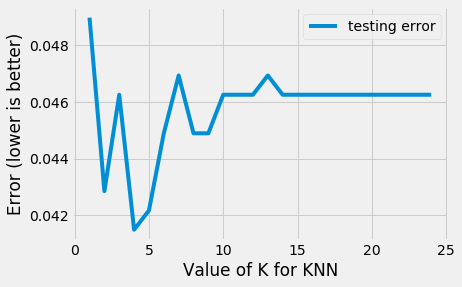

In [100]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [95]:
df.sort_values('testing error').head(10)

,training error,testing error
K,,
1,0.995713,0.379592
21,0.701919,0.444218
18,0.701511,0.445578
20,0.701511,0.446259
16,0.701715,0.446939
19,0.702532,0.448299
24,0.700490,0.448980
3,0.995917,0.449660
17,0.702736,0.451701


In [84]:
feature_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_diox', 'ttl_sulfur_diox', 'density', 'pH',
       'sulphates', 'alcohol']
X = white_wine[feature_cols]
y = white_wine['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [85]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9585034013605442


In [51]:
y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print('testing accuracy:',testing_accuracy)

testing accuracy: 0.9585034013605442


# Random Forest 

In [52]:
from sklearn.ensemble import RandomForestClassifier
feature_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_diox', 'ttl_sulfur_diox', 'density', 'pH',
       'sulphates', 'alcohol']
X = white_wine[feature_cols]
y = white_wine['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
pred_rfc = rf.predict(X_test)

In [53]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.96      1.00      0.98      1402
           3       1.00      0.05      0.09        61

    accuracy                           0.96      1470
   macro avg       0.65      0.35      0.36      1470
weighted avg       0.95      0.96      0.94      1470



# Logistic Regression - Prediction

In [54]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression
feature_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_diox', 'ttl_sulfur_diox', 'density', 'pH',
       'sulphates', 'alcohol']
X = white_wine[feature_cols]
y = white_wine['rating']

logr.fit(X,y)
white_wine['pred'] = logr.predict(X)

/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [55]:
white_wine['pred_prob'] = logr.predict_proba(X)[:, 1]

In [56]:
white_wine.sort_values(by='rating', ascending=False).head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_diox,ttl_sulfur_diox,density,pH,sulphates,alcohol,quality,rating,pred,pred_prob
3665,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.2,8,3,2,0.854610
3253,5.3,0.30,0.16,4.2,0.029,37.0,100.0,0.99050,3.30,0.36,11.8,8,3,2,0.902282
1980,7.6,0.20,0.30,14.2,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8,3,2,0.982151
1981,7.6,0.20,0.30,14.2,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8,3,2,0.982151
1106,5.2,0.24,0.45,3.8,0.027,21.0,128.0,0.99200,3.55,0.49,11.2,8,3,2,0.965955
1982,7.6,0.20,0.30,14.2,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8,3,2,0.982151
1983,7.6,0.20,0.30,14.2,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8,3,2,0.982151
1984,7.6,0.20,0.30,14.2,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8,3,2,0.982151
2298,6.3,0.41,0.18,3.5,0.027,23.0,109.0,0.99018,3.34,0.54,12.8,8,3,2,0.919759
1991,7.6,0.20,0.30,14.2,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8,3,2,0.982151
